## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  34.118740   596.408258  0.358092  9.461282  1.385045
1  93.992043   474.031172  0.062366  5.389446  0.244244
2  63.212957   914.381092  0.696085  5.640183  1.421347
3  62.051275  1030.875378  0.227100  3.954945  1.403504
4  24.763293   658.140950  0.372890  4.414096  1.466528


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0427103	total: 57.8ms	remaining: 57.8s
1:	learn: 1.0332590	total: 58.2ms	remaining: 29.1s
2:	learn: 1.0236811	total: 58.7ms	remaining: 19.5s
3:	learn: 1.0140829	total: 59.3ms	remaining: 14.8s
4:	learn: 1.0020630	total: 59.9ms	remaining: 11.9s
5:	learn: 0.9922024	total: 60.4ms	remaining: 10s
6:	learn: 0.9827066	total: 60.9ms	remaining: 8.63s
7:	learn: 0.9723474	total: 61.3ms	remaining: 7.6s
8:	learn: 0.9622558	total: 61.8ms	remaining: 6.8s
9:	learn: 0.9517420	total: 62.3ms	remaining: 6.17s
10:	learn: 0.9439587	total: 62.8ms	remaining: 5.64s
11:	learn: 0.9345168	total: 63.2ms	remaining: 5.2s
12:	learn: 0.9264883	total: 63.7ms	remaining: 4.84s
13:	learn: 0.9174069	total: 64.3ms	remaining: 4.53s
14:	learn: 0.9083935	total: 64.7ms	remaining: 4.25s
15:	learn: 0.8985292	total: 65.2ms	remaining: 4.01s
16:	learn: 0.8888181	total: 65.7ms	remaining: 3.8s
17:	learn: 0.8794479	total: 66.1ms	remaining: 3.61s
18:	learn: 0.8716180	total: 66.6ms	remaining: 3.44

115:	learn: 0.4033903	total: 107ms	remaining: 816ms
116:	learn: 0.4011564	total: 108ms	remaining: 813ms
117:	learn: 0.3985053	total: 108ms	remaining: 809ms
118:	learn: 0.3962010	total: 109ms	remaining: 804ms
119:	learn: 0.3932864	total: 109ms	remaining: 800ms
120:	learn: 0.3913326	total: 110ms	remaining: 796ms
121:	learn: 0.3895025	total: 110ms	remaining: 791ms
122:	learn: 0.3872844	total: 110ms	remaining: 787ms
123:	learn: 0.3850138	total: 111ms	remaining: 783ms
124:	learn: 0.3823823	total: 111ms	remaining: 778ms
125:	learn: 0.3799550	total: 112ms	remaining: 774ms
126:	learn: 0.3772942	total: 112ms	remaining: 769ms
127:	learn: 0.3748448	total: 112ms	remaining: 764ms
128:	learn: 0.3724320	total: 113ms	remaining: 761ms
129:	learn: 0.3702656	total: 113ms	remaining: 758ms
130:	learn: 0.3683332	total: 114ms	remaining: 754ms
131:	learn: 0.3665479	total: 114ms	remaining: 751ms
132:	learn: 0.3638992	total: 115ms	remaining: 747ms
133:	learn: 0.3614934	total: 115ms	remaining: 743ms
134:	learn: 

298:	learn: 0.1823095	total: 185ms	remaining: 434ms
299:	learn: 0.1819808	total: 186ms	remaining: 433ms
300:	learn: 0.1814194	total: 186ms	remaining: 433ms
301:	learn: 0.1810994	total: 187ms	remaining: 432ms
302:	learn: 0.1808068	total: 187ms	remaining: 431ms
303:	learn: 0.1801290	total: 188ms	remaining: 430ms
304:	learn: 0.1798946	total: 188ms	remaining: 428ms
305:	learn: 0.1796110	total: 188ms	remaining: 427ms
306:	learn: 0.1793187	total: 189ms	remaining: 426ms
307:	learn: 0.1790308	total: 189ms	remaining: 425ms
308:	learn: 0.1787571	total: 189ms	remaining: 423ms
309:	learn: 0.1784765	total: 190ms	remaining: 422ms
310:	learn: 0.1775510	total: 190ms	remaining: 421ms
311:	learn: 0.1767716	total: 191ms	remaining: 420ms
312:	learn: 0.1760586	total: 191ms	remaining: 420ms
313:	learn: 0.1757934	total: 192ms	remaining: 419ms
314:	learn: 0.1750625	total: 192ms	remaining: 417ms
315:	learn: 0.1748742	total: 192ms	remaining: 416ms
316:	learn: 0.1746072	total: 193ms	remaining: 415ms
317:	learn: 

536:	learn: 0.0985992	total: 289ms	remaining: 249ms
537:	learn: 0.0984128	total: 290ms	remaining: 249ms
538:	learn: 0.0981844	total: 290ms	remaining: 248ms
539:	learn: 0.0980292	total: 290ms	remaining: 247ms
540:	learn: 0.0978765	total: 291ms	remaining: 247ms
541:	learn: 0.0975143	total: 291ms	remaining: 246ms
542:	learn: 0.0973646	total: 292ms	remaining: 245ms
543:	learn: 0.0969498	total: 292ms	remaining: 245ms
544:	learn: 0.0965313	total: 292ms	remaining: 244ms
545:	learn: 0.0963852	total: 293ms	remaining: 243ms
546:	learn: 0.0960342	total: 293ms	remaining: 243ms
547:	learn: 0.0956314	total: 293ms	remaining: 242ms
548:	learn: 0.0952884	total: 294ms	remaining: 241ms
549:	learn: 0.0951122	total: 294ms	remaining: 241ms
550:	learn: 0.0947677	total: 295ms	remaining: 240ms
551:	learn: 0.0945957	total: 295ms	remaining: 239ms
552:	learn: 0.0942570	total: 296ms	remaining: 239ms
553:	learn: 0.0941156	total: 296ms	remaining: 238ms
554:	learn: 0.0939764	total: 297ms	remaining: 238ms
555:	learn: 

715:	learn: 0.0591132	total: 367ms	remaining: 145ms
716:	learn: 0.0589074	total: 367ms	remaining: 145ms
717:	learn: 0.0587819	total: 368ms	remaining: 144ms
718:	learn: 0.0586429	total: 368ms	remaining: 144ms
719:	learn: 0.0585061	total: 368ms	remaining: 143ms
720:	learn: 0.0583544	total: 369ms	remaining: 143ms
721:	learn: 0.0582406	total: 369ms	remaining: 142ms
722:	learn: 0.0581190	total: 369ms	remaining: 141ms
723:	learn: 0.0579994	total: 370ms	remaining: 141ms
724:	learn: 0.0578299	total: 370ms	remaining: 140ms
725:	learn: 0.0576590	total: 370ms	remaining: 140ms
726:	learn: 0.0575289	total: 371ms	remaining: 139ms
727:	learn: 0.0574014	total: 371ms	remaining: 139ms
728:	learn: 0.0571902	total: 371ms	remaining: 138ms
729:	learn: 0.0570714	total: 372ms	remaining: 137ms
730:	learn: 0.0569548	total: 372ms	remaining: 137ms
731:	learn: 0.0568113	total: 373ms	remaining: 136ms
732:	learn: 0.0566164	total: 373ms	remaining: 136ms
733:	learn: 0.0565021	total: 373ms	remaining: 135ms
734:	learn: 

955:	learn: 0.0359638	total: 471ms	remaining: 21.7ms
956:	learn: 0.0359028	total: 472ms	remaining: 21.2ms
957:	learn: 0.0358727	total: 472ms	remaining: 20.7ms
958:	learn: 0.0358196	total: 472ms	remaining: 20.2ms
959:	learn: 0.0357329	total: 473ms	remaining: 19.7ms
960:	learn: 0.0356578	total: 473ms	remaining: 19.2ms
961:	learn: 0.0356036	total: 474ms	remaining: 18.7ms
962:	learn: 0.0355740	total: 474ms	remaining: 18.2ms
963:	learn: 0.0354998	total: 474ms	remaining: 17.7ms
964:	learn: 0.0354328	total: 475ms	remaining: 17.2ms
965:	learn: 0.0354038	total: 475ms	remaining: 16.7ms
966:	learn: 0.0353437	total: 475ms	remaining: 16.2ms
967:	learn: 0.0353151	total: 476ms	remaining: 15.7ms
968:	learn: 0.0352492	total: 476ms	remaining: 15.2ms
969:	learn: 0.0351821	total: 477ms	remaining: 14.7ms
970:	learn: 0.0351159	total: 477ms	remaining: 14.3ms
971:	learn: 0.0350193	total: 478ms	remaining: 13.8ms
972:	learn: 0.0349665	total: 478ms	remaining: 13.3ms
973:	learn: 0.0349383	total: 479ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

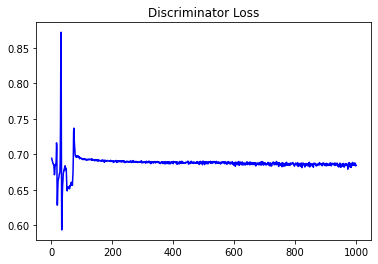

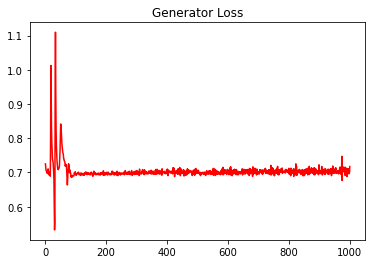

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.13312377428434058


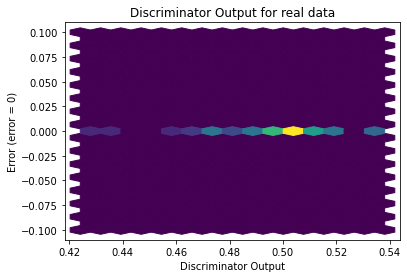

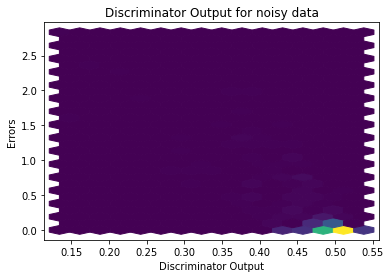

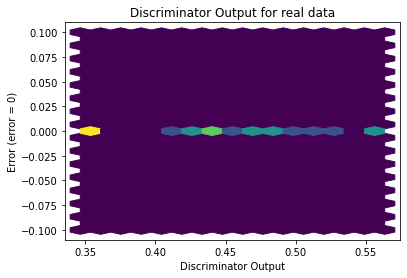

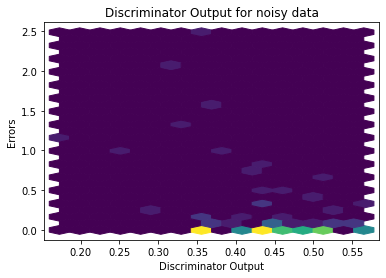

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


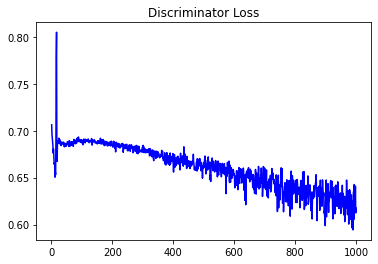

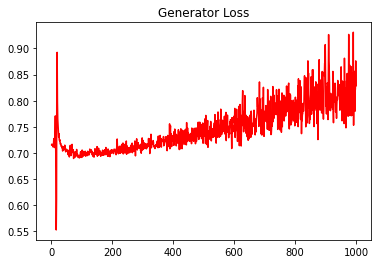

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.17386852542403206


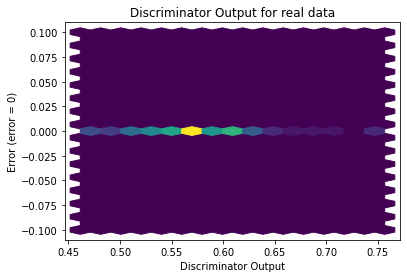

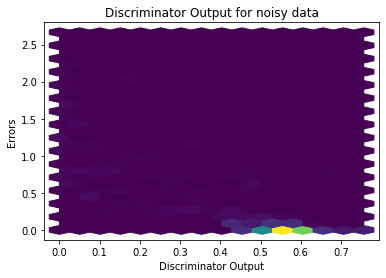

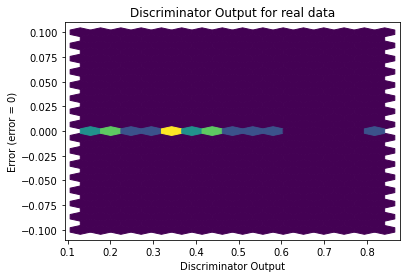

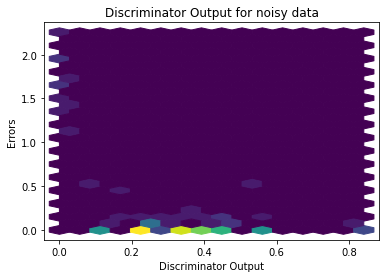

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1258]], requires_grad=True)
